# Források
https://www.tensorflow.org/tutorials/text/transformer

https://arxiv.org/pdf/2001.08317.pdf

In [1]:
'''
folder = str("../logs/20200706_15_03_03/") # error
folder = str("../logs/20200706_15_03_14/") # linear sho 312-123
folder = str("../logs/20200706_15_54_06/") # linear mid 59000-23000
folder = str("../logs/20200706_16_13_49/") # square mid 10000-3700
folder = str("../logs/20200706_16_14_42/") # squrae mid 87000-34000
folder = str("../logs/20200706_16_22_17/") # square mid 23000-8900 amorf
folder = str("../logs/20200707_11_46_33/") # linear sho 3500-1400
folder = str("../logs/20200707_12_32_33/") # error
folder = str("../logs/20200707_12_32_38/") # error
folder = str("../logs/20200707_12_32_41/") # error
folder = str("../logs/20200707_12_34_38/") # error
folder = str("../logs/20200707_13_12_55/") # error
folder = str("../logs/20200707_13_13_09/") # linear lon 136000-54000
folder = str("../logs/20200707_13_25_05/") # linear lon 120000-47000
folder = str("../logs/20200707_13_33_27/") # linear lon 120000-46000
folder = str("../logs/20200707_13_41_32/") # linear lon 130000-53000
folder = str("../logs/20200707_14_44_12/") # infini lon 340000-134000
folder = str("../logs/20200707_15_07_14/") # infini lon 370000-150000

folder = str("../logs/20200826_15_51_57/") # random sho 26655
folder = str("../logs/20200826_15_39_41/") # random sho 18464
folder = str("../logs/20200826_15_47_49/") # random sho 41667
folder = str("../logs/20200826_15_42_44/") # random sho 15481
folder = str("../logs/20200826_16_09_56/") # random mid 135798

folder = str("../logs/20200829_11_53_21/") # 1D no Noise yesPeriodic no Rot - d.keepData(0,91500)
folder = str("../logs/20200829_12_05_54/") # 1D yesNoise yesPeriodic no Rot
folder = str("../logs/20200829_12_14_39/") # 1D no Noise no Periodic no Rot
folder = str("../logs/20200829_12_22_54/") # 1D yesNoise no Periodic no Rot
folder = str("../logs/20200829_12_37_57/") # 1D no Noise yesPeriodic yesRot
folder = str("../logs/20200829_12_50_33/") # 1D yesNoise yesPeriodic yesRot
folder = str("../logs/20200829_12_58_43/") # 1D no Noise no Periodic yesRot
folder = str("../logs/20200829_13_07_41/") # 1D yesNoise no Periodic yesRot
folder = str("../logs/20200829_15_02_13/") # 2D no Noise yesPeriodic no Rot
folder = str("../logs/20200829_15_14_20/") # 2D yesNoise yesPeriodic no Rot
folder = str("../logs/20200829_15_24_14/") # 2D no Noise no Periodic no Rot
folder = str("../logs/20200829_15_35_38/") # 2D yesNoise no Periodic no Rot
folder = str("../logs/20200829_16_11_21/") # 2D no Noise yesPeriodic yesRot
folder = str("../logs/20200829_16_25_41/") # 2D yesNoise yesPeriodic yesRot
folder = str("../logs/20200829_16_39_47/") # 2D yesNoise no Periodic yesRot
folder = str("../logs/20200829_16_48_48/") # 2D no Noise no Periodic yesRot
''';

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataStreamPreprocessor import DataStream, Normalizer, Batcher
import matplotlib.pyplot

In [3]:
# Chose measurement pack
#file = str("../logs/20200829_11_53_21/") # 1D no Noise yesPeriodic no Rot

folder = str("../logs/20200829_11_53_21/") # 1D no Noise yesPeriodic no Rot - d.keepData(0,91500)

d = DataStream(folder)
print(d.data.shape)

(175626, 20)


In [4]:
#d.keepData(180,90000)

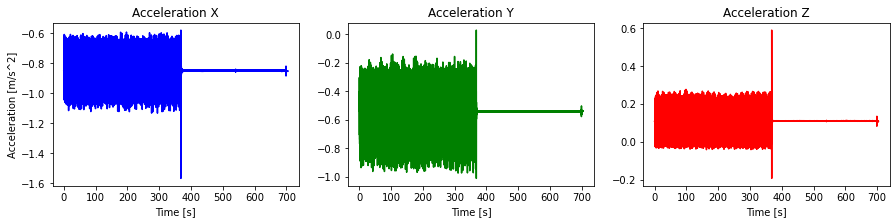

In [5]:
# Plot data
d.plotData(acc=True)

In [6]:
# Input -Output signal options from MARG sensor and MoCap system
d.addFeature(['diff_Timestamp', 'diff_Marg_posX', 'diff_Marg_posY', 'diff_Marg_posZ', 'diff_Marg_posX', 'diff_Marg_posY', 'diff_Marg_posZ'])
d.showHeader()

0 - Timestamp
1 - AccX
2 - AccY
3 - AccZ
4 - GyroX
5 - GyroY
6 - GyroZ
7 - MagX
8 - MagY
9 - MagZ
10 - Marg_posX
11 - Marg_posY
12 - Marg_posZ
13 - Marg_quatX
14 - Marg_quatY
15 - Marg_quatZ
16 - Marg_quatW
17 - Marg_rotX
18 - Marg_rotY
19 - Marg_rotZ
20 - diff_Timestamp
21 - diff_Marg_posX
22 - diff_Marg_posY
23 - diff_Marg_posZ
24 - diff_Marg_posX
25 - diff_Marg_posY
26 - diff_Marg_posZ


In [7]:
d.filterData(31, 'hanning', [24, 25, 26])

In [8]:
# Actual input and label data for the training. The columns defined in data_const will be constat in each sequence (first value)
data = [20,1,2,3,4,5,6,7,8,9,21,22,23]
data_const = [-3,-2,-1]

label = [24,25,26]

# Training parameters
input_size = len(data)
target_size = len(label)
dropout_rate = 0.2

in_seq_len = 128
tar_seq_len = 1
batch_size = 64

epochs = 7

netType = 'ConvNet'

In [9]:
# Parsing the data
X_alap, X_header, _, _ = d.dataParser(data, [], in_seq_len, const_inputs=data_const)
_, _, Y_alap, Y_header = d.dataParser([], label, tar_seq_len)
Y_alap=Y_alap[in_seq_len-1:,...].copy()

# Normalizing the data
nx = Normalizer(normtype='minmax')
ny = Normalizer(normtype='minmax')

X_norm = nx.normalize(X_alap)
Y_norm = ny.normalize(Y_alap)

X_norm[:,:,0] = X_alap[:,:,0] * 100

# Batching the data
batcher = Batcher(batch_size, shuffle=True)
X = batcher.batch(X_norm)
Y = batcher.batch(Y_norm)

In [10]:
# Dimension check
print('d.data: ', d.data.shape)
print('X_alap:   ', X_alap.shape, '   Y_alap: ', Y_alap.shape)
print('X_norm:   ', X_norm.shape, '   Y_norm: ', Y_norm.shape)
print('X:        ', X.shape,      ' Y:      ', Y.shape)

d.data:  (175626, 27)
X_alap:    (175499, 128, 13)    Y_alap:  (175499, 1, 3)
X_norm:    (175499, 128, 13)    Y_norm:  (175499, 1, 3)
X:         (2742, 64, 128, 13)  Y:       (2742, 64, 1, 3)


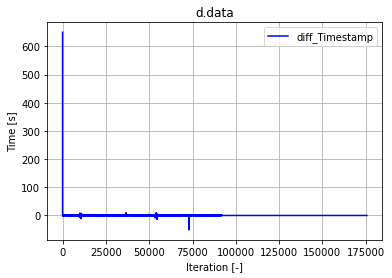

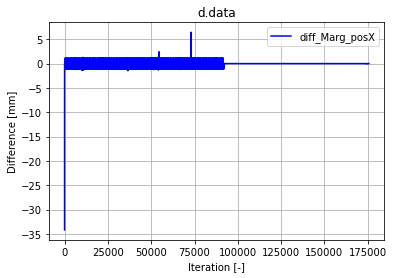

In [11]:
plt.figure(1)
plt.title("d.data")
plt.plot(d.data[:,-4], label='diff_Timestamp', color='blue')
plt.ylabel("Time [s]")
plt.xlabel("Iteration [-]")
plt.legend()
plt.grid()

plt.figure(2)
plt.title("d.data")
plt.plot(d.data[:,-3], label='diff_Marg_posX', color='blue')
plt.ylabel("Difference [mm]")
plt.xlabel("Iteration [-]")
plt.legend()
plt.grid()

plt.figure(3)
plt.title("d.data")
plt.plot(d.data[:,-1], label='diff_Marg_posY', color='blue')
plt.ylabel("Difference [mm]")
plt.xlabel("Iteration [-]")
plt.legend()
plt.grid()

plt.figure(4)
plt.title("d.data")
plt.plot(d.data[:,1], label='diff_Marg_posY', color='blue')
plt.ylabel("Acceleration [g]")
plt.xlabel("Iteration [-]")
plt.legend()
plt.grid()

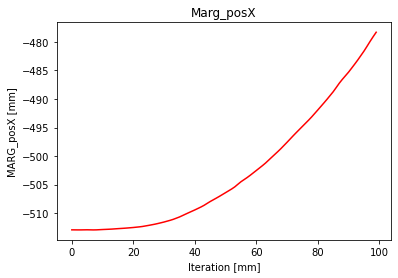

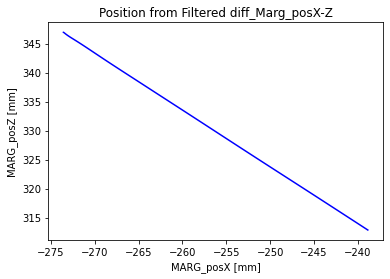

In [13]:
pos_x = np.cumsum(d.data[:, -3])
pos_z = np.cumsum(d.data[:, -1])

start = 200
end = 300

plt.figure(1)
plt.title("Marg_posX-Z from MoCap")
plt.plot(d.data[start:end, 10], d.data[start:end, 12], color='red')    
plt.xlabel('MARG_posX [mm]')
plt.ylabel('MARG_posZ [mm]')
plt.show

plt.figure(2)
plt.title("Marg_posX")
plt.plot(d.data[start:end, 10], color='red')    
plt.xlabel('Iteration [mm]')
plt.ylabel('MARG_posX [mm]')
plt.show()

plt.figure(3)
plt.title("Position from Filtered diff_Marg_posX")
plt.plot(pos_x[start:end], color='blue')    
plt.xlabel('Iteration')
plt.ylabel('MARG_posX [mm]')
plt.show()

plt.figure(4)
plt.title("Position from Filtered diff_Marg_posX-Z")
plt.plot(pos_x[start:end], pos_z[start:end], color='blue')    
plt.xlabel('MARG_posX [mm]')
plt.ylabel('MARG_posZ [mm]')
plt.show()

In [14]:
# Print a random sequece
'''
rand_seq = 15000
feature_0 = 0
feature_1 = 2

plt.figure()
plt.plot(X_alap[rand_seq, :, feature_0], color='red', label=(str(X_header[feature_0])+ '_alap'))
plt.legend()
plt.title(str(rand_seq) + '. random sequence')

plt.figure()
plt.plot(X_norm[rand_seq, :, feature_0], color='red', label=(str(X_header[feature_0])+ '_norm'))
plt.legend()
plt.title(str(rand_seq) + '. random sequence')

plt.figure()
plt.plot(X_alap[rand_seq, :, feature_1], color='blue', label=(str(X_header[feature_1])+ '_alap'))
plt.legend()
plt.title(str(rand_seq) + '. random sequence')

plt.figure()
plt.plot(X_norm[rand_seq, :, feature_1], color='blue', label=(str(X_header[feature_1])+ '_norm'))
plt.legend()
plt.title(str(rand_seq) + '. random sequence')

plt.figure()
plt.plot(d.arr_mess[:, feature_1], color='blue', label=str(d.data_header[feature_1]))
plt.legend()
plt.title('Full measurement')
''';
# Notes:
# -1<Marg_quatW<1 , no neccesary need for normalization

In [15]:
import tensorflow as tf
import time

In [16]:
class ConvNet(tf.keras.Model):
    def __init__(self,in_seq_len,in_size,target_size):
        super(ConvNet, self).__init__()
        self.c1_1 = tf.keras.layers.Conv1D(32,1,input_shape=(in_seq_len,in_size),activation='relu',padding="same")
        self.c1_2 = tf.keras.layers.Conv1D(64,3,activation='relu',padding="same")
        self.p1 = tf.keras.layers.MaxPool1D(2)
        self.c2 = tf.keras.layers.Conv1D(64,5,activation='relu',padding="same")
        self.p2 = tf.keras.layers.MaxPool1D(2)
        self.c3 = tf.keras.layers.Conv1D(128,7,activation='relu',padding="same")
        self.LSTM1  = tf.keras.layers.LSTM(32, return_sequences=True, activation = 'tanh',
                                           recurrent_activation = 'sigmoid', recurrent_dropout = 0,
                                           unroll = False, use_bias = True)
        self.LSTM2  = tf.keras.layers.LSTM(64, return_sequences=True, activation = 'tanh',
                                           recurrent_activation = 'sigmoid', recurrent_dropout = 0,
                                           unroll = False, use_bias = True)
        self.f = tf.keras.layers.GlobalAveragePooling1D()
        self.d1 = tf.keras.layers.Dense(128,activation='tanh')
        self.d2 = tf.keras.layers.Dense(target_size)
        
    def call(self, inp):
        x=self.c1_1(inp)
        x=self.c1_2(x)
        x=self.p1(x)
        #x=self.c2(x)
        #x=self.p2(x)
        #x=self.c3(x)
        x = self.LSTM1(x)
        #x = self.LSTM2(x)
        x = self.f(x)
        x=self.d1(x)
        x=self.d2(x)
        
        return x

In [17]:
class DenseNet(tf.keras.Model):
    def __init__(self,in_seq_len,in_size,target_size):
        super(DenseNet, self).__init__()
        
        self.inputdim=in_size*in_seq_len
        
        self.d1 = tf.keras.layers.Dense(self.inputdim,activation='relu')
        self.d2 = tf.keras.layers.Dense(128,activation='relu')
        self.d3 = tf.keras.layers.Dense(256,activation='relu')
        self.d4 = tf.keras.layers.Dense(512,activation='relu')
        self.d5 = tf.keras.layers.Dense(target_size,activation='relu')
        
    def call(self, inp):
        x = tf.reshape(inp,(tf.shape(inp)[0],self.inputdim))
        x=self.d1(x)
        x=self.d2(x)
        x=self.d3(x)
        x=self.d4(x)
        x=self.d5(x)
        
        return x

In [18]:
class LSTMnet(tf.keras.Model):
    def __init__(self, in_seq_len,in_size,target_size):
        super(LSTMnet, self).__init__()
        self.LSTM1  = tf.keras.layers.LSTM(64, input_shape=(in_seq_len,in_size), return_sequences=True, activation = 'tanh',
                                           recurrent_activation = 'sigmoid', recurrent_dropout = 0,
                                           unroll = False, use_bias = True)
        
        self.Dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.Dense2 = tf.keras.layers.Dense(target_size, activation=None)
        
    def call(self,inp):
        output = self.LSTM1(inp)
        output = self.Dense1(output)
        output = self.Dense2(output)
        
        return output

In [19]:
optimizer = tf.keras.optimizers.Nadam(1e-5, beta_1=0.9,
                                     beta_2=0.98, epsilon=1e-9, )

In [20]:
def loss_function(real, pred):
    return tf.reduce_mean(tf.math.square(real-pred))

train_loss = tf.keras.metrics.Mean(name='train_loss')

In [21]:
# Net architecture
if netType == 'DenseNet':
    transformer = DenseNet(in_seq_len,input_size,target_size)
if netType == 'LSTMnet':
    transformer = LSTMnet(in_seq_len,input_size,target_size)
if netType == 'ConvNet':
    transformer = ConvNet(in_seq_len,input_size,target_size)

In [22]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

'''
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Checkpoint restored")
''';

In [23]:
train_step_signature =  [
    tf.TensorSpec(shape=(None, None, input_size), dtype=tf.float32),
    tf.TensorSpec(shape=(None, 1, target_size), dtype=tf.float32)
    ]

@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
    with tf.GradientTape() as tape:
        predictions = transformer(inp)
        
        loss = loss_function(tar, predictions)
        
    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
    
    train_loss(loss)

In [24]:
# epochs = 15

In [25]:
# Training and feedback
for epoch in range(epochs):
    stime = time.time()
    
    train_loss.reset_states()
    
    for batch in range(X.shape[0]):
        inp = X[batch]
        tar = Y[batch]
        train_step(inp, tar)
        
        if batch % 50 ==0:
            print('Epoch {} Batch {} Loss {:.5f}'.format(
            epoch+1, batch, train_loss.result()
            ))
    
    if (epoch+1) %5 ==0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1,
                                                         ckpt_save_path))
    
    print ('Epoch {} Loss {:.5f}'.format(epoch + 1, 
                                                train_loss.result()))

    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - stime))
        

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv_net/conv1d_1/conv1d (defined at <ipython-input-16-68fa3cf6079f>:22) ]] [Op:__inference_train_step_354345]

Function call stack:
train_step


In [ ]:
# Random prediction
stime=time.time()
idx = 100
inp = X_norm[idx].reshape((1,in_seq_len,input_size))
tar_last = Y_alap[idx,-1,:]
pred = transformer(inp)
denormed = ny.denormalize(pred)
print("Predicted: ", np.array(denormed)[0],"\nReal:      ",tar_last)
print('\nPrediction time: ', time.time()-stime)

In [ ]:
Xdiff_pred = []
Ydiff_pred = []
Zdiff_pred = []
Xdiff_error = []
Ydiff_error = []
Zdiff_error = []

maxsteps = 500
idx = 0
times = np.arange(maxsteps)*0.004

for idx in range(maxsteps):
    #stime = time.time()
    inp = X_norm[idx].reshape((1,in_seq_len,input_size))
    tar_last = Y_alap[idx+in_seq_len,-1,:]
    pred = transformer(inp)
    #denormed = np.array(ny.denormalize(pred)).flatten()
    denormed = np.array(pred).flatten()
    #print(tar_last)
    #appendtime=time.time()
    Xdiff_pred.append(denormed[0])
    Ydiff_pred.append(denormed[1])
    Zdiff_pred.append(denormed[2])
    diff = denormed-tar_last
    Xdiff_error.append(diff[0])
    Ydiff_error.append(diff[1])
    Zdiff_error.append(diff[2])
    #print("Full: ",time.time()-stime,"  Append: ",time.time()-appendtime)

In [ ]:
plt.figure(1,figsize=(12,6))
plt.title("Prediction")
plt.plot(times, Xdiff_pred, label='Xdiff_pred', color='blue')
plt.plot(times, Ydiff_pred, label='Ydiff_pred', color='red')
plt.plot(times, Zdiff_pred, label='Zdiff_pred', color='green')
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend()
plt.grid()

plt.figure(2,figsize=(12,6))
plt.title("Diff_Position original data")
plt.plot(times, Y_alap[:maxsteps,0,0], label=str(label[0]), color='blue')
plt.plot(times, Y_alap[:maxsteps,0,1], label=str(label[1]), color='red')
plt.plot(times, Y_alap[:maxsteps,0,2], label=str(label[2]), color='green')
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend()
plt.grid()

plt.figure(3,figsize=(12,6))
plt.title("Prediction error")
plt.plot(times, Xdiff_error, label='Xdiff', color='blue')
plt.plot(times, Ydiff_error, label='Ydiff', color='red')
plt.plot(times, Zdiff_error, label='Zdiff', color='green')
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend()
plt.grid()

x_pred = np.cumsum(Xdiff_pred)
y_pred = np.cumsum(Ydiff_pred)
z_pred = np.cumsum(Zdiff_pred)
x_tar = np.cumsum(Y_alap[:maxsteps,-1,0])
y_tar = np.cumsum(Y_alap[:maxsteps,-1,1])
z_tar = np.cumsum(Y_alap[:maxsteps,-1,2])

plt.figure(4,figsize=(12,6))
plt.title("Above view (latest ground truth values known)")
plt.plot(x_pred,z_pred, label='Prediction')
plt.plot(x_tar,z_tar, label= 'Target')
plt.ylabel("Z coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend()
plt.grid()

In [ ]:
plt.figure(1,figsize=(12,6))
plt.title("Prediction")
plt.plot(times, Xdiff_pred, label='Xdiff_pred', color='blue')
plt.plot(times, Y_alap[:maxsteps,0,0], label=str(label[0]), color='red')
#plt.plot(times, Zdiff_pred, label='Zdiff_pred', color='green')
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend()
plt.grid()
'''
plt.figure(2,figsize=(12,6))
plt.title("Diff_Position original data")
plt.plot(times, Y_alap[:maxsteps,0,0], label=str(label[0]), color='blue')
plt.plot(times, Y_alap[:maxsteps,0,1], label=str(label[1]), color='red')
plt.plot(times, Y_alap[:maxsteps,0,2], label=str(label[2]), color='green')
plt.ylabel("Difference [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend()
plt.grid()
''';

In [ ]:
'''
Xdiff_pred = []
Ydiff_pred = []
Zdiff_pred = []
Xdiff_error = []
Ydiff_error = []
Zdiff_error = []

maxsteps = 500
idx = 0
times = np.arange(maxsteps)*0.004
tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
tar_inp = tar[:,:-1,:]

for idx in range(maxsteps):
    inp = X_norm[idx].reshape((1,in_seq_len,input_size))
    tar_last = Y_alap[idx,-1,:]
    pred = transformer(inp)
    denormed = np.array(ny.denormalize(pred)).flatten()
    Xdiff_pred.append(denormed[0])
    Ydiff_pred.append(denormed[1])
    Zdiff_pred.append(denormed[2])
    diff = denormed-tar_last
    if idx > 10:
        tar_inp=np.concatenate([tar_inp[:,1:,:],np.array(pred).reshape(1,1,-1)],axis=1)
    else:
        tar = Y_norm[idx].reshape((1,tar_seq_len,target_size))
        tar_inp = tar[:,:-1,:]
    Xdiff_error.append(diff[0])
    Ydiff_error.append(diff[1])
    Zdiff_error.append(diff[2])
''';

In [ ]:
'''
plt.figure(1,figsize=(12,8))
plt.title("Prediction error (With initial ground truth only)")
plt.plot(times, Xdiff_error, label = 'Xdiff_error')
plt.plot(times, Ydiff_error, label = 'Ydiff_error')
plt.plot(times, Zdiff_error, label = 'Zdiff_error')
plt.ylabel("Error [mm]")
plt.xlabel("Elapsed time [sec]")
plt.legend()
plt.grid()


x_pred = np.cumsum(Xdiff_pred)
y_pred = np.cumsum(Ydiff_pred)
x_tar = np.cumsum(Y_alap[:maxsteps,-1,0])
y_tar = np.cumsum(Y_alap[:maxsteps,-1,1])
plt.figure(2,figsize=(12,8))
plt.title("Above view (With initial ground truth only)")
plt.plot(x_pred, y_pred, label= 'Prediction')
plt.plot(x_tar,y_tar, label= 'Target')
plt.ylabel("Y coordinate [mm]")
plt.xlabel("X coordinate [mm]")
plt.legend()
plt.grid()
''';